In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d princelv84/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/princelv84/dogsvscats
License(s): MIT
100% 544M/545M [00:07<00:00, 92.7MB/s]
100% 545M/545M [00:07<00:00, 75.8MB/s]


In [8]:
import zipfile
zipref = zipfile.ZipFile('/content/dogsvscats.zip','r')
zipref.extractall('/content')
zipref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# genrators :- devide data in batches
# Training data
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train/',
    labels = 'inferred',
    label_mode = 'int', # assign cat 0 and dog 1
    batch_size = 32,
    image_size = (256,256)
)

# Testing data
test_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test/',
    labels = 'inferred',
    label_mode = 'int', # assign cat 0 and dog 1
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# which means trasforming our pixel values from 0-255 to 0-1
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [13]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model=Sequential()

model.add((Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2),
])

# Apply data augmentation to the training dataset
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Now, let's retrain the model with the augmented data for a reasonable number of epochs (e.g., 10 or 15)
history=model.fit(augmented_train_ds, epochs=15, validation_data=test_ds)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 515ms/step - accuracy: 0.5664 - loss: 2.5934 - val_accuracy: 0.6718 - val_loss: 0.6273
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 519ms/step - accuracy: 0.6538 - loss: 0.6235 - val_accuracy: 0.6288 - val_loss: 0.6476
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 513ms/step - accuracy: 0.6877 - loss: 0.5893 - val_accuracy: 0.7096 - val_loss: 0.5770
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 510ms/step - accuracy: 0.7296 - loss: 0.5427 - val_accuracy: 0.7586 - val_loss: 0.4831
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 505ms/step - accuracy: 0.7520 - loss: 0.5039 - val_accuracy: 0.7914 - val_loss: 0.4390
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 507ms/step - accuracy: 0.7809 - loss: 0.4717 - val_accuracy: 0.8068 - val_loss: 0.4250
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 508ms/step - accuracy: 0.7949 - loss: 0.4442 - val_accuracy: 0.7754 - val_loss: 0.5005
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 517ms/step - accuracy: 0.8115 -

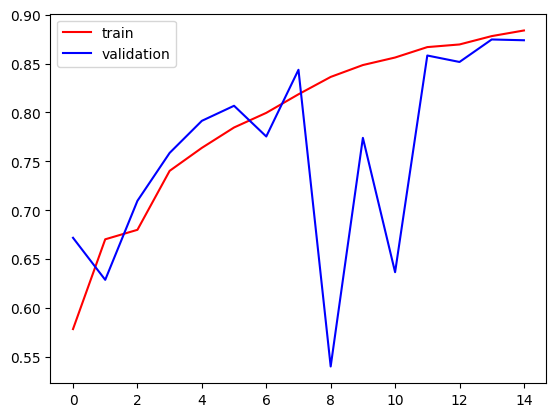

In [18]:
import matplotlib.pyplot as plt
# accuracy plots
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

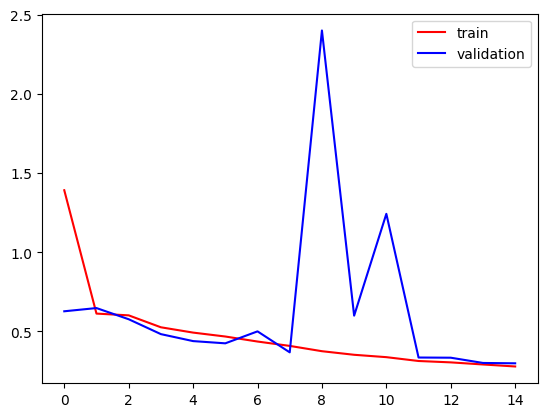

In [19]:
# loss plot
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

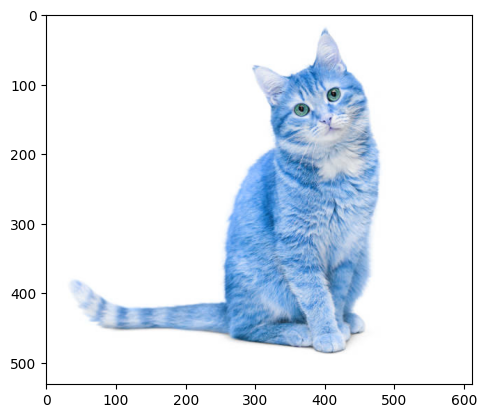

In [21]:
ctest_img=cv2.imread('/content/istockphoto-1443562748-612x612.jpg')
plt.imshow(ctest_img)

In [22]:
ctest_img.shape

(531, 612, 3)

In [23]:
ctest_img=cv2.resize(ctest_img,(256,256))

In [24]:
cinput=ctest_img.reshape((1,256,256,3))

In [25]:
model.predict(cinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

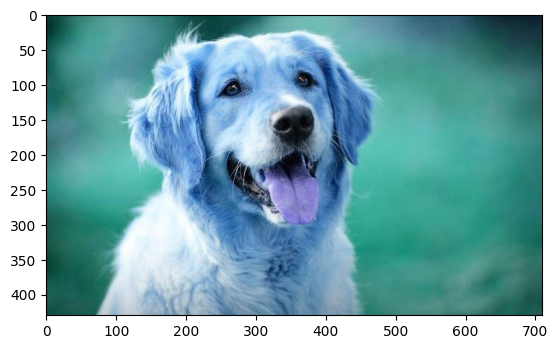

In [26]:
dtest_img=cv2.imread('/content/golden-retriever-tongue-out.jpg')
plt.imshow(dtest_img)
dtest_img.shape
dtest_img=cv2.resize(dtest_img,(256,256))
dinput=dtest_img.reshape((1,256,256,3))

In [27]:
model.predict(dinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[1.2720608e-06]], dtype=float32)